In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()


In [7]:
df.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,NaN,NaN,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,NaN,NaN,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,NaN,NaN,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121


In [8]:
df[df.PRIMARY_KEY == '2008_VIRGINIA']

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
879,2008_VIRGINIA,VIRGINIA,2008,1230857.0,14768120.0,897627.0,5957786.0,7912707.0,15236306.0,8003167.0,...,91133.0,92881.0,87177.0,735090.0,380787.0,1145864.0,NaN,NaN,NaN,NaN
880,2008_VIRGINIA,VIRGINIA,2008,1230857.0,14768120.0,897627.0,5957786.0,7912707.0,15236306.0,8003167.0,...,4666.0,3863.0,2535.0,36807.0,12837.0,51345.0,NaN,NaN,NaN,NaN
882,2008_VIRGINIA,VIRGINIA,2008,1230857.0,14768120.0,897627.0,5957786.0,7912707.0,15236306.0,8003167.0,...,2548.0,1485.0,484.0,19226.0,2758.0,24554.0,NaN,NaN,NaN,NaN


In [9]:
clean_df = df.copy()

for state in df.STATE.unique():
    clean_df[clean_df.STATE == state] = df[df.STATE == state].interpolate(limit_direction='both')
    
to_drop_array = []
for state in clean_df[pd.isnull(clean_df.ENROLL) == True].STATE:
    to_drop_array.append(state)
    
rows_to_drop = []
for row_index in range(len(clean_df)):
    if clean_df.STATE[row_index] in to_drop_array:
        rows_to_drop.append(row_index)
        
clean_df = clean_df.drop(clean_df.index[rows_to_drop])
clean_df.reset_index(drop=True, inplace=True)

In [11]:
# 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
clean_df.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1331,1331,1331.000000,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,...,1331.000000,1331.000000,1331.000000,1.331000e+03,1.331000e+03,1.331000e+03,1331.000000,1331.000000,1331.000000,1331.000000
unique,1326,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.515402,9.131361e+05,9.246804e+06,7.772786e+05,4.289618e+06,4.179907e+06,9.342417e+06,4.844756e+06,...,70629.268219,70297.409467,59976.570248,5.678150e+05,2.714961e+05,8.587217e+05,232.625750,277.259687,218.426661,263.060632
std,NaN,NaN,7.493076,1.062873e+06,1.200350e+07,1.155857e+06,5.674137e+06,5.608607e+06,1.220752e+07,6.433283e+06,...,82510.978461,80913.761323,70443.806263,6.600617e+05,3.167206e+05,1.000186e+06,10.515407,10.200408,7.783760,6.094701
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,2548.000000,1485.000000,484.000000,1.922600e+04,2.758000e+03,2.455400e+04,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,2.560480e+05,2.200842e+06,1.910190e+05,1.172219e+06,7.254095e+05,2.176975e+06,1.177296e+06,...,19814.000000,20214.000000,17074.000000,1.610640e+05,7.650500e+04,2.392380e+05,226.037597,271.374965,214.418475,259.229461
50%,NaN,NaN,2005.000000,6.483130e+05,5.169926e+06,4.100510e+05,2.578149e+06,2.089445e+06,5.298267e+06,2.688963e+06,...,49603.000000,49523.000000,39826.000000,4.012150e+05,1.822810e+05,6.056220e+05,234.164993,278.958709,220.066378,264.197005
75%,NaN,NaN,2011.000000,1.006874e+06,1.109900e+07,8.440360e+05,5.185174e+06,4.808003e+06,1.087317e+07,5.641158e+06,...,79198.000000,80513.500000,70997.000000,6.394140e+05,3.156855e+05,9.681460e+05,240.721827,284.061374,223.698109,267.434860


Things I find Remarkable about this data:
1. There are 3 entries for 2008_Virginia. Upon further inspection, they are not identical...
2. The Total revenue varies a LOT.
3. Average math and reading scores actually have a very small standard deviation.

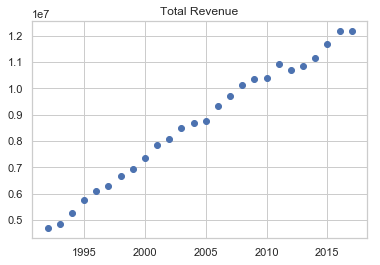

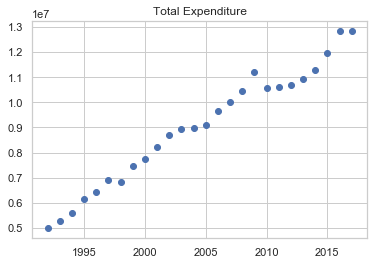

In [24]:
plt.scatter(clean_df.YEAR[clean_df.STATE == 'MINNESOTA'],clean_df.TOTAL_REVENUE[clean_df.STATE == 'MINNESOTA'])
plt.title('Total Revenue')
plt.show()
plt.scatter(clean_df.YEAR[clean_df.STATE == 'MINNESOTA'],clean_df.TOTAL_EXPENDITURE[clean_df.STATE == 'MINNESOTA'])
plt.title('Total Expenditure')
plt.show()

In 2011, Minnesota notably failed no child left behind and did not meet 'Adequate Yearly Progress' in about half of its schools, which impacts funding from the feds.
https://www.mprnews.org/story/2011/09/29/no-child-left-behind-schools-miss-federal-marks

A local news article also noticed the bump in expenditures in 2009, and attributed it to updated increase in employee benefits.
https://www.minnpost.com/education/2018/05/minnesota-debates-last-minute-funding-boost-some-historical-context-state-funding/


In [60]:
math_4_average_by_year = {}
for year in clean_df.YEAR.unique():
    math_4_average_by_year[year] = (np.mean(clean_df.AVG_MATH_4_SCORE[clean_df.YEAR == year]))
    
math_8_average_by_year = {}
for year in clean_df.YEAR.unique():
    math_8_average_by_year[year] = (np.mean(clean_df.AVG_MATH_8_SCORE[clean_df.YEAR == year]))
    
reading_4_average_by_year = {}
for year in clean_df.YEAR.unique():
    reading_4_average_by_year[year] = (np.mean(clean_df.AVG_READING_4_SCORE[clean_df.YEAR == year]))
    http://localhost:8890/notebooks/Code/Untitled.ipynb?kernel_name=python3#
reading_8_average_by_year = {}
for year in clean_df.YEAR.unique():
    reading_8_average_by_year[year] = (np.mean(clean_df.AVG_READING_8_SCORE[clean_df.YEAR == year]))

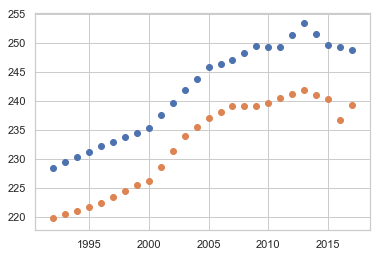

In [59]:
plt.scatter(clean_df.YEAR[clean_df.STATE == "MINNESOTA"], clean_df.AVG_MATH_4_SCORE[clean_df.STATE == 'MINNESOTA'], alpha=1)
plt.scatter(math_4_average_by_year.keys(), math_4_average_by_year.values())
plt.show()

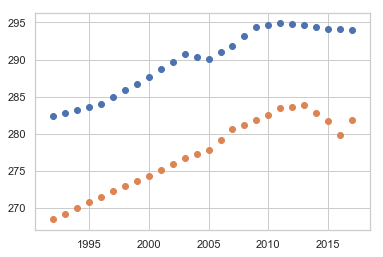

In [62]:
plt.scatter(clean_df.YEAR[clean_df.STATE == "MINNESOTA"], clean_df.AVG_MATH_8_SCORE[clean_df.STATE == 'MINNESOTA'], alpha=1)
plt.scatter(math_8_average_by_year.keys(), math_8_average_by_year.values())
plt.show()

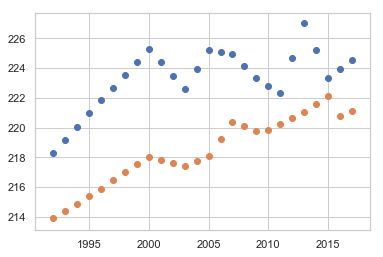

In [64]:
plt.scatter(clean_df.YEAR[clean_df.STATE == "MINNESOTA"], clean_df.AVG_READING_4_SCORE[clean_df.STATE == 'MINNESOTA'])
plt.scatter(reading_4_average_by_year.keys(), reading_4_average_by_year.values())
plt.show()

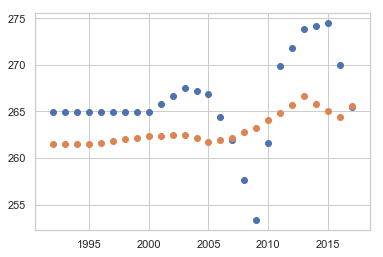

In [65]:
plt.scatter(clean_df.YEAR[clean_df.STATE == "MINNESOTA"], clean_df.AVG_READING_8_SCORE[clean_df.STATE == 'MINNESOTA'], alpha=1)
plt.scatter(reading_8_average_by_year.keys(), reading_8_average_by_year.values())
plt.show()

In [76]:
math_4_difference = (clean_df.AVG_MATH_4_SCORE[clean_df.STATE == 'MINNESOTA'].mean() - clean_df.AVG_MATH_4_SCORE.mean())/clean_df.AVG_MATH_4_SCORE.std()
math_8_difference = (clean_df.AVG_MATH_8_SCORE[clean_df.STATE == 'MINNESOTA'].mean() - clean_df.AVG_MATH_8_SCORE.mean())/clean_df.AVG_MATH_8_SCORE.std()
reading_4_difference = (clean_df.AVG_READING_4_SCORE[clean_df.STATE == 'MINNESOTA'].mean() - clean_df.AVG_READING_4_SCORE.mean())/clean_df.AVG_READING_4_SCORE.std()
reading_8_difference = (clean_df.AVG_READING_8_SCORE[clean_df.STATE == 'MINNESOTA'].mean() - clean_df.AVG_READING_8_SCORE.mean())/clean_df.AVG_READING_8_SCORE.std()

In [77]:
print(math_4_difference)
print(math_8_difference)
print(reading_4_difference)
print(reading_8_difference)

0.8849216303684253
1.2366139710436626
0.6327853325766901
0.4850770942735284


In Minnesota, students are more standard deviations above the mean in math than they are in reading.

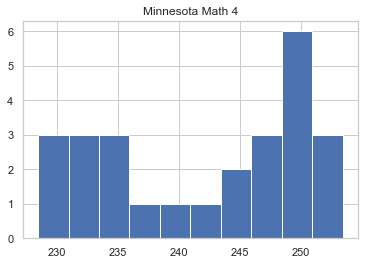

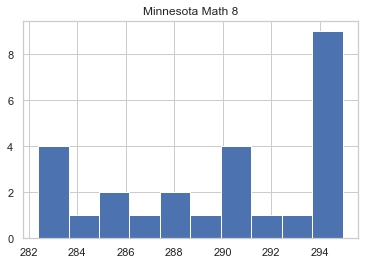

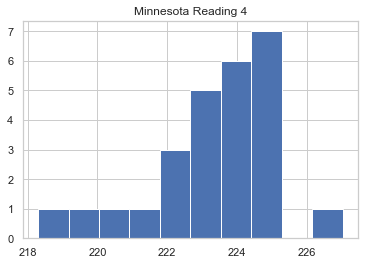

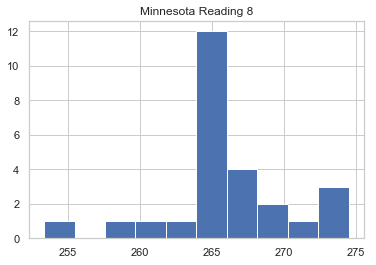

In [81]:
plt.hist(clean_df.AVG_MATH_4_SCORE[clean_df.STATE == 'MINNESOTA'])
plt.title('Minnesota Math 4')
plt.show()
plt.hist(clean_df.AVG_MATH_8_SCORE[clean_df.STATE == 'MINNESOTA'])
plt.title('Minnesota Math 8')
plt.show()
plt.hist(clean_df.AVG_READING_4_SCORE[clean_df.STATE == 'MINNESOTA'])
plt.title('Minnesota Reading 4')
plt.show()
plt.hist(clean_df.AVG_READING_8_SCORE[clean_df.STATE == 'MINNESOTA'])
plt.title('Minnesota Reading 8')
plt.show()

In [83]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 25 columns):
PRIMARY_KEY                     1331 non-null object
STATE                           1331 non-null object
YEAR                            1331 non-null int64
ENROLL                          1331 non-null float64
TOTAL_REVENUE                   1331 non-null float64
FEDERAL_REVENUE                 1331 non-null float64
STATE_REVENUE                   1331 non-null float64
LOCAL_REVENUE                   1331 non-null float64
TOTAL_EXPENDITURE               1331 non-null float64
INSTRUCTION_EXPENDITURE         1331 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1331 non-null float64
OTHER_EXPENDITURE               1331 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1331 non-null float64
GRADES_PK_G                     1331 non-null float64
GRADES_KG_G                     1331 non-null float64
GRADES_4_G                      1331 non-null float64
GRADES_8_G                      1